In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Load datasets
df_deaths = pd.read_csv("smoking_healthcomparison_1924_2023.csv")
df_healthlevel = pd.read_csv("smokers_health_data_kaggle.csv")
df_features = pd.read_csv("features_dataset.csv")
df_ecigarette = pd.read_csv("e_cigarette_prevalence_14_countries.csv")
 #country based
df_smoking = pd.read_csv("Smoking Rate 2025.csv")
df_income = pd.read_csv("Country-Income-and-Education-Level.csv")
df_expenditure= pd.read_csv("annual-healthcare-expenditure.csv")
df_globalhealth = pd.read_csv("Bloomberg Global Health Index_DP.csv")
df_obesitiy = pd.read_csv("obesity_country.csv")
df_mortality = pd.read_csv("mortality_bycountry.csv")
df_airQ = pd.read_csv("airQ_deaths.csv")


#Data Cleaning/ Processing

In [ ]:
#Dropping the columns that will be useless for me and renaming some of them to look neat in visualization
df_deaths = pd.read_csv("smoking_healthcomparison_1924_2023.csv")
columns_to_drop = ['City', 'Anti_Smoking_Campaigns', 'Legislation_Strength']
df_cleaned_deaths = df_deaths.drop(columns=columns_to_drop)

df_cleaned_deaths = df_cleaned_deaths.rename(columns={
    'Male_Smokers_Percentage': 'Male',
    'Female_Smokers_Percentage': 'Female',
    'Smoking_Related_Deaths': 'Deaths',
    'Youth_Smokers_Percentage': 'youth smokers',
    'Average_Cigarettes_Per_Day': 'daily average'
})
#print(df_cleaned_deaths.head())

df_healthlevel['systolic_bp'] = df_healthlevel['blood_pressure'].str.split('/').str[0].astype(float)
df_healthlevel['current_smoker'] = df_healthlevel['current_smoker'].replace({
    'yes': 'smoker',
    'no': 'not smoker'
})
df_clean_healthlevel= df_healthlevel
#print(df_clean_healthlevel.head())


df_features = pd.read_csv("features_dataset.csv")
columns_to_keep = [
    'weight(kg)', 
    'fasting blood sugar', 
    'triglyceride', 
    'HDL', 
    'LDL', 
    'hemoglobin', 
    'serum creatinine']

df_cleaned_features = df_features[columns_to_keep]
#print(df_cleaned_features.head())

df_ecigarette = pd.read_csv("e_cigarette_prevalence_14_countries.csv")
df_cleaned_EC = df_ecigarette.rename(columns={
    'Awareness_Prevalence_%': '%Awareness',
    'Ever_Use_Prevalence_%': '%Used ever',
    'Current_Use_Prevalence_%': '%Current use'
})
#print(df_cleaned_EC.head())

df_clean_income = df_income.dropna(subset=['Education Index'])

df_expenditure= pd.read_csv("annual-healthcare-expenditure.csv")
df_cleaned_expenditure = df_expenditure.rename(columns={
    'Current health expenditure per capita, PPP (current international $)': 'current healthcare expenditure'})
#print(df_cleaned_expenditure.head())

df_mortality = pd.read_csv("mortality_bycountry.csv")
columns_to_drop2 = ['Unnamed: 0','DateModified', 'Sex']
df_cleaned_mortality = df_mortality.drop(columns=columns_to_drop2)
#print(df_cleaned_mortality.head())


Explatory Data Analysis

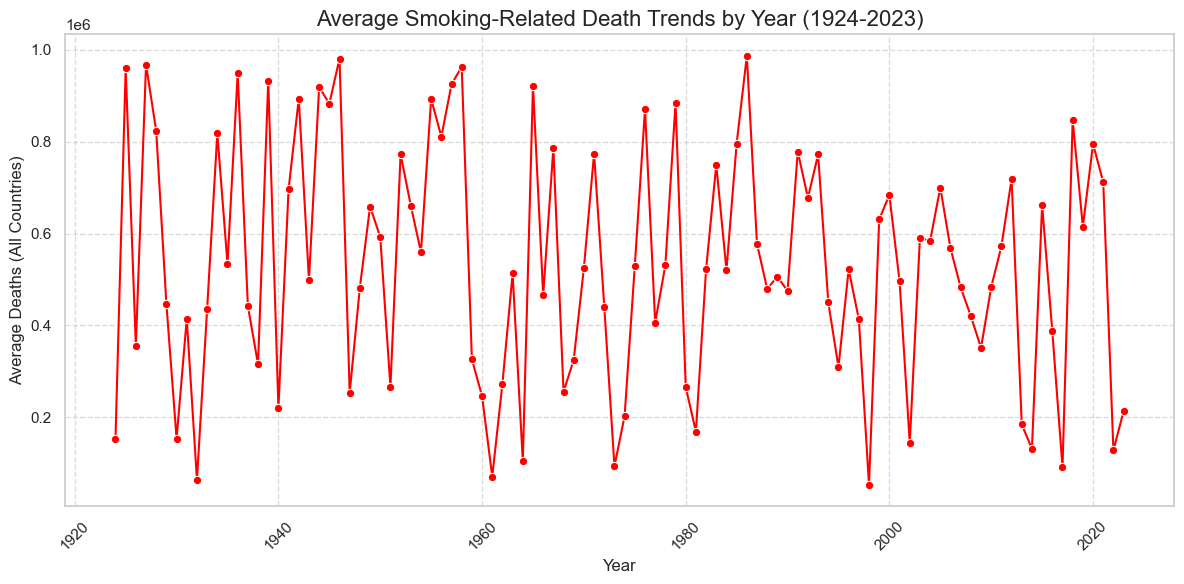

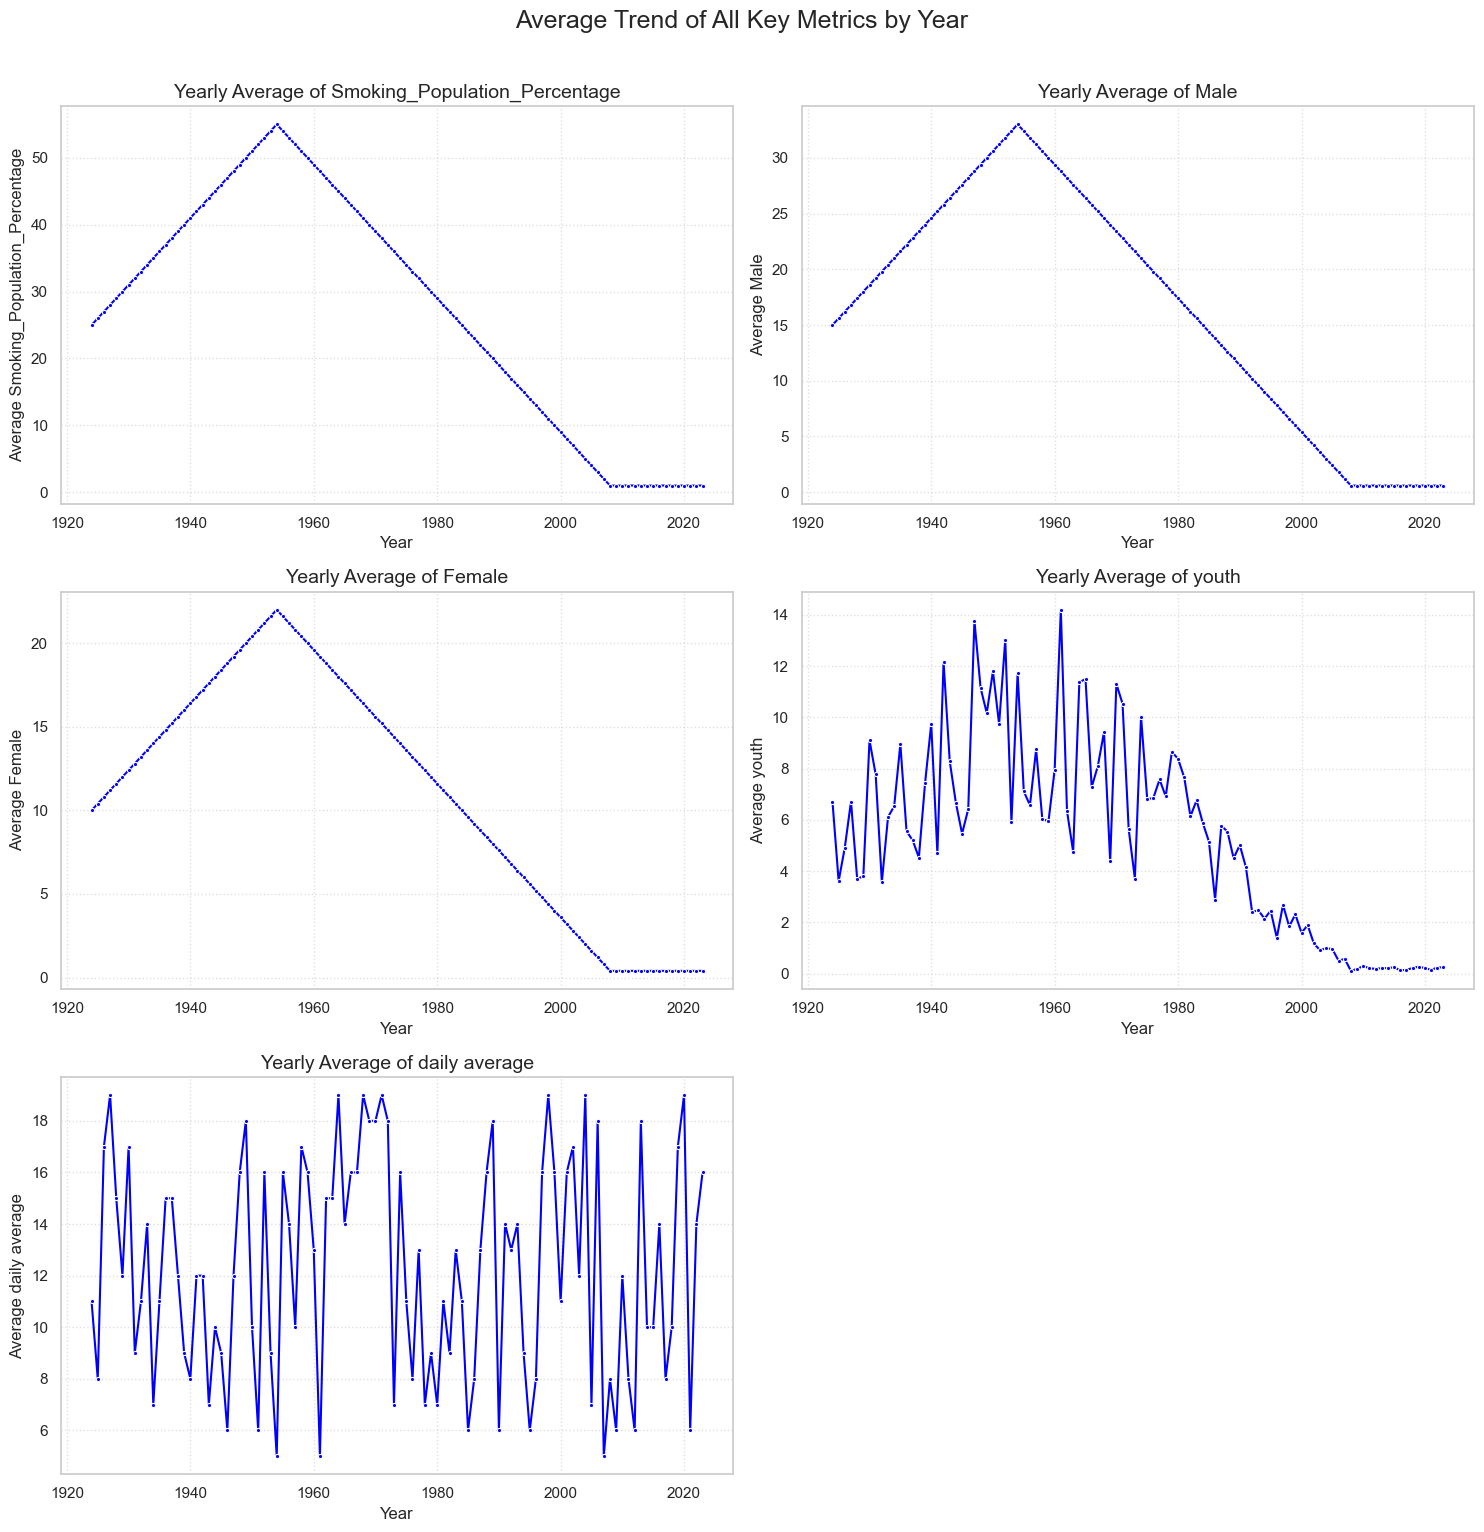

In [111]:
#  1. Taking yearly averages because I want to handle a total value of all countries
df_yearly_average = df_cleaned_deaths.groupby('Year').mean(numeric_only=True).reset_index()

# =================================================================
#Average Deaths Trend by Year (Single Graph)
# =================================================================

plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df_yearly_average,
    x='Year',
    y='Deaths',
    color='red',
    marker='o' # show points
)

plt.title('Average Smoking-Related Death Trends by Year (1924-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Deaths (All Countries)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('yearly_average_deaths_trend.png') 
plt.show()

# =================================================================
# Subplots for all other metrics
# =================================================================

# Choose other metrices to plot seperately
columns_to_plot = [
    'Smoking_Population_Percentage',
    'Male',
    'Female',
    'youth',
    'daily average'
]
num_cols = len(columns_to_plot)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten() 

for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    sns.lineplot(data=df_yearly_average, x='Year', y=col, ax=ax, color='blue', marker='.')
    ax.set_title(f'Yearly Average of {col}', fontsize=14)
    ax.set_xlabel('Year')
    ax.set_ylabel(f'Average {col}')
    ax.grid(True, linestyle=':', alpha=0.6)

fig.delaxes(axes[num_cols])

plt.suptitle('Average Trend of All Key Metrics by Year', fontsize=18, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 1.01])

# Save
plt.savefig('yearly_average_all_metrics_trend.png')
plt.show() # plotting

C:\Users\komse\AppData\Local\Temp\ipykernel_3180\121728519.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\komse\AppData\Local\Temp\ipykernel_3180\121728519.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['smoker', 'not smoker'])
C:\Users\komse\AppData\Local\Temp\ipykernel_3180\121728519.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\komse\AppData\Local\Temp\ipykernel_3180\121728519.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['smok

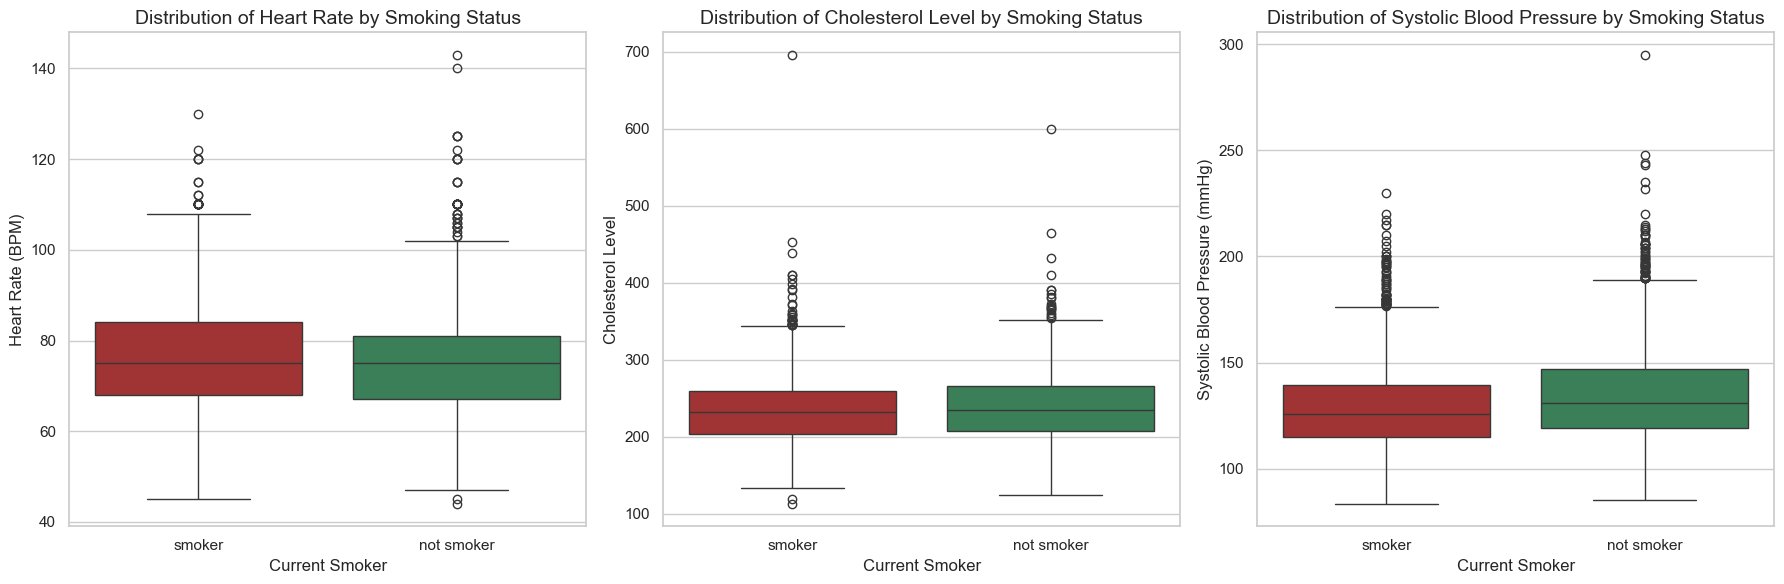

In [71]:

# Setting a style for better visualization
sns.set_style("whitegrid")

# Dropping rows with missing values in them
cols_to_plot = ['current_smoker', 'heart_rate', 'chol', 'systolic_bp']
df_clean_healthlevel = df_clean_healthlevel[cols_to_plot].dropna()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define metrics, their descriptive English titles, and axis labels
metrics = [
    ('heart_rate', 'Heart Rate (BPM)', 'Distribution of Heart Rate by Smoking Status'),
    ('chol', 'Cholesterol Level', 'Distribution of Cholesterol Level by Smoking Status'),
    ('systolic_bp', 'Systolic Blood Pressure (mmHg)', 'Distribution of Systolic Blood Pressure by Smoking Status')
]

palette = {'smoker': 'firebrick', 'not smoker': 'seagreen'}

# Generate box plots
for i, (col, y_label, title) in enumerate(metrics):
    sns.boxplot(
        x='current_smoker',
        y=col,
        data=df_clean_healthlevel,
        palette=palette,
        ax=axes[i]
    )
    axes[i].set_title(title, fontsize=14)
    axes[i].set_xlabel('Current Smoker', fontsize=12)
    axes[i].set_ylabel(y_label, fontsize=12)
    # Set x-tick labels to descriptive status ('no' is the first category, 'yes' is the second)
    axes[i].set_xticklabels(['smoker', 'not smoker'])

plt.tight_layout()



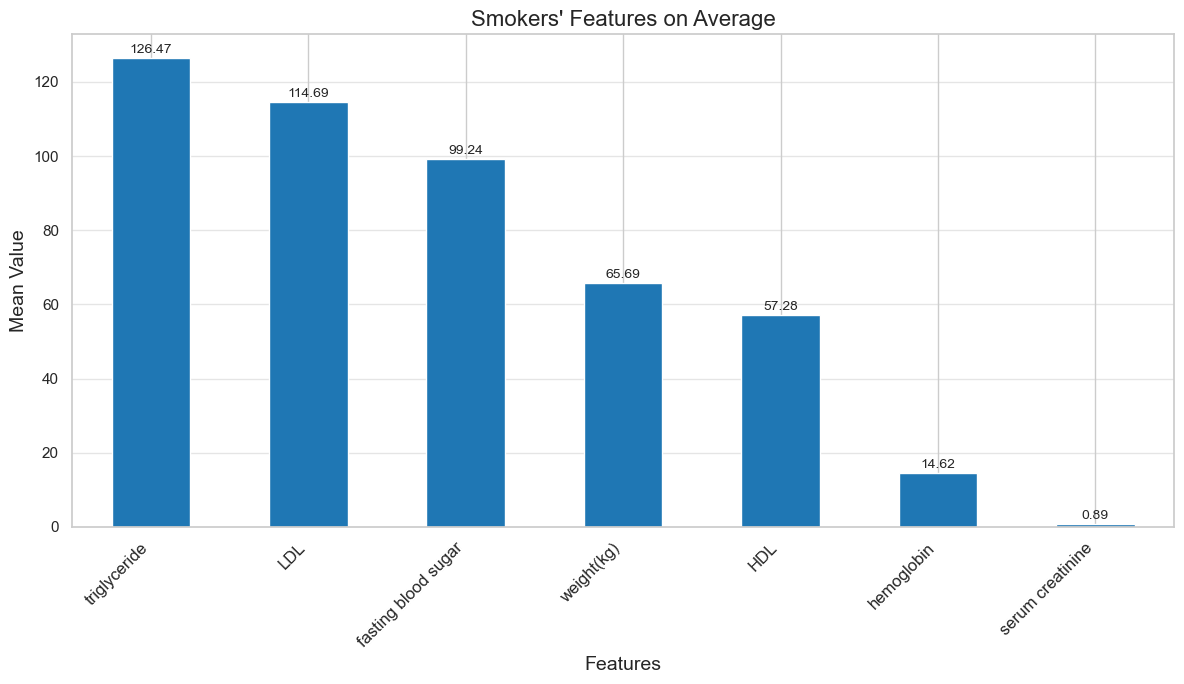

In [80]:
df_cleaned_features = df_features[columns_to_keep].copy()

mean_values = df_cleaned_features.mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))

# Plot the sorted mean values
bars = mean_values.plot(kind='bar', color='#1f77b4')

plt.title("Smokers' Features on Average", fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Mean Value', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12) 

# 4. Çubukların üzerine ortalama değerleri ekleme
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, 
             f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.grid(axis='y', alpha=0.5)
plt.savefig('mean_features_bar_chart_original_labels.png')

# plt.show()

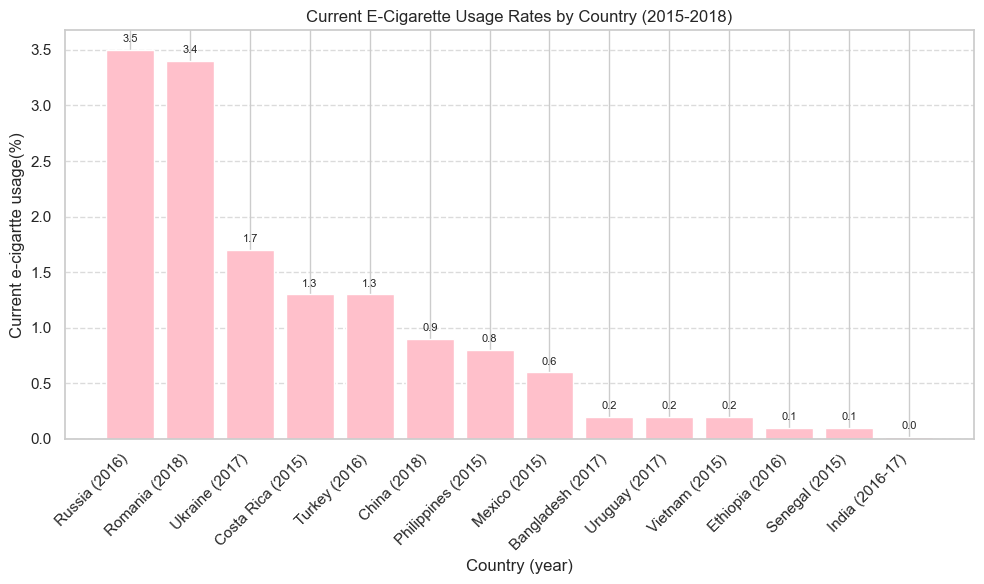

In [82]:
df_sorted = df_cleaned_EC.sort_values(by='%Current use', ascending=False)

plt.figure(figsize=(10, 6))

bars = plt.bar(df_sorted['Country_Year'], df_sorted['%Current use'], color='pink')

plt.xlabel("Country (year)")
plt.ylabel("Current e-cigartte usage(%)")
plt.title("Current E-Cigarette Usage Rates by Country (2015-2018)")
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f'{yval:.1f}', ha='center', va='bottom', fontsize=8)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig("current_use_prevalence_bar_chart.png")

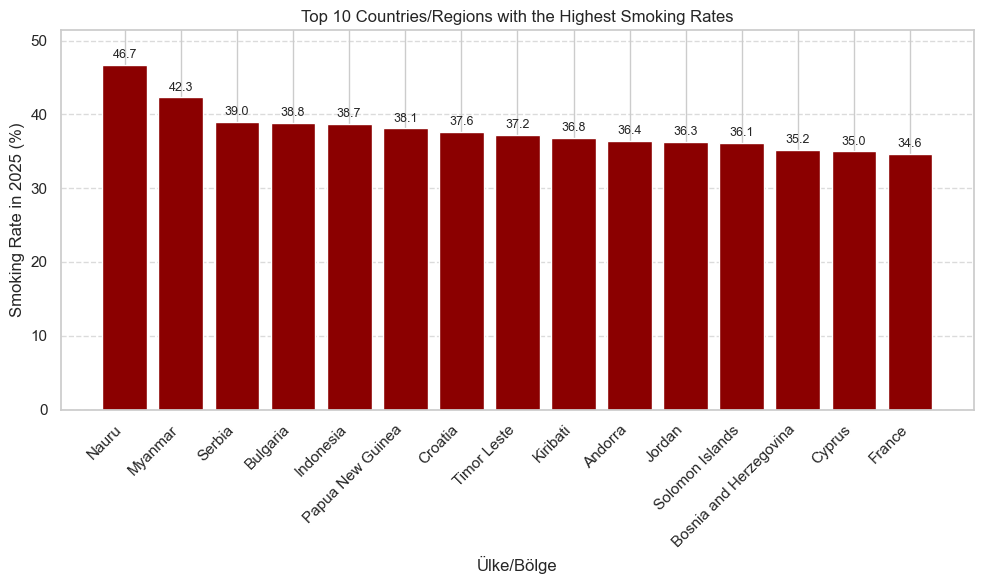

In [84]:
#PLotting top 15 countries in smoking ratings
df_top_15 = df_smoking.head(15)

plt.figure(figsize=(10, 6))

bars = plt.bar(df_top_15['Region'], df_top_15['Smoking Rate 2025'], color='darkred')
plt.xlabel("Ülke/Bölge")
plt.ylabel("Smoking Rate in 2025 (%)")
plt.title("Top 10 Countries/Regions with the Highest Smoking Rates")
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    # Değerleri çubuğun üstüne biraz boşluk bırakarak yazma
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}', ha='center', va='bottom', fontsize=9)

plt.ylim(0, df_top_15['Smoking Rate 2025'].max() * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

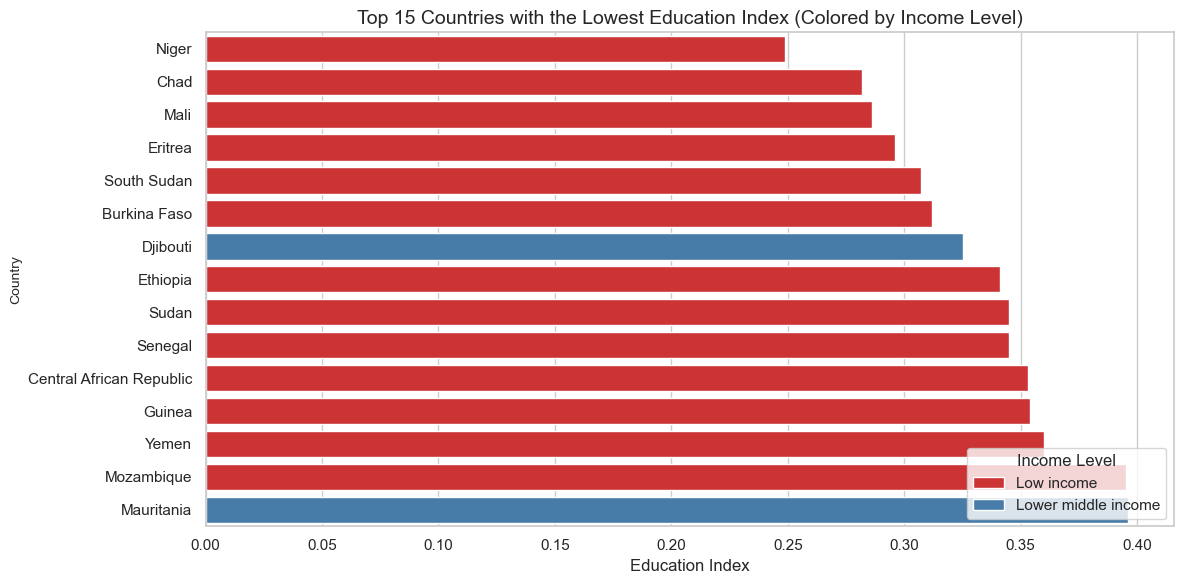

In [93]:
# sort from lowest education level to highest
df_sorted = df_clean_income.sort_values(by='Education Index', ascending=True)

# Choose first 15 countries with low education index
top_15_lowest = df_sorted.head(15)

income_order = ['High income', 'Upper middle income', 'Lower middle income', 'Low income']
color_scheme = ['#984ea3', '#4daf4a', '#377eb8', '#e41a1c'] # Mor, Yeşil, Mavi, Kırmızı
color_map = dict(zip(income_order, color_scheme))

# Arrange countries
country_order = top_15_lowest['Country'].tolist()

plt.figure(figsize=(12, 6))
# Horizontal Bar Plot
sns.barplot(
    data=top_15_lowest,
    x='Education Index', 
    y='Country',         
    hue='Income',       
    palette=color_map,  
    order=country_order, 
    dodge=False        
)

plt.title('Top 15 Countries with the Lowest Education Index (Colored by Income Level)', fontsize=14)
plt.xlabel('Education Index', fontsize=12)
plt.ylabel('Country', fontsize=10)

# Adjust the legend
plt.legend(title='Income Level', loc='lower right')

plt.tight_layout()
plt.savefig('bottom_15_overall_education_matplotlib.png')


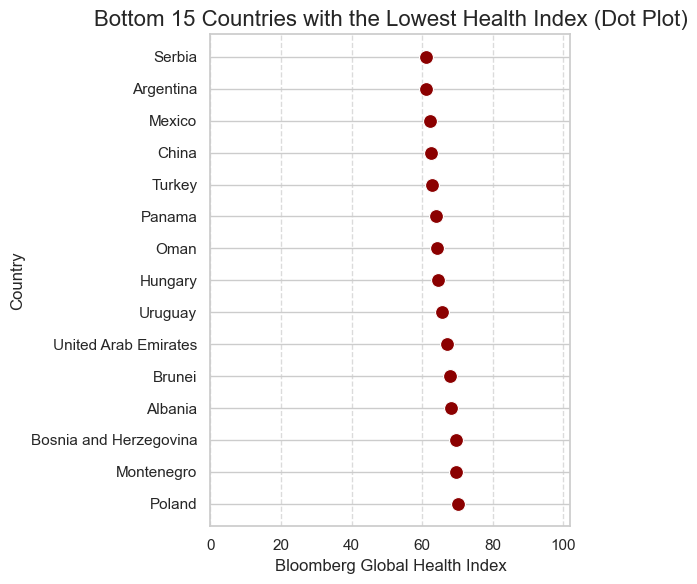

In [104]:
#top_15_health = df_globalhealth.head(15)
# Sort the data by the index value in descending order.
top_15= df_globalhealth.sort_values(by='Bloomberg Global Health Index', ascending=True)

plt.figure(figsize=(6, 6))

# Create a Dot Plot using seaborn's scatterplot function
sns.scatterplot(
    data=top_15.head(15),
    x='Bloomberg Global Health Index',
    y='Region',
    s=100, # Marker size (dots)
    color='darkred'
)

# Set the title and labels in English
plt.title('Bottom 15 Countries with the Lowest Health Index (Dot Plot)', fontsize=16)
plt.xlabel('Bloomberg Global Health Index', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Set the X-axis limit to start near 0 for better context
plt.xlim(0, top_15['Bloomberg Global Health Index'].max() * 1.1)

# Add grid lines for better value readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('bottom_15_health_index_dotplot.png')

<>:46: SyntaxWarning: invalid escape sequence '\m'
<>:46: SyntaxWarning: invalid escape sequence '\m'
C:\Users\komse\AppData\Local\Temp\ipykernel_3180\3985207868.py:46: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Mean PM Concentration ($\mu g/m^3$)', fontsize=12)


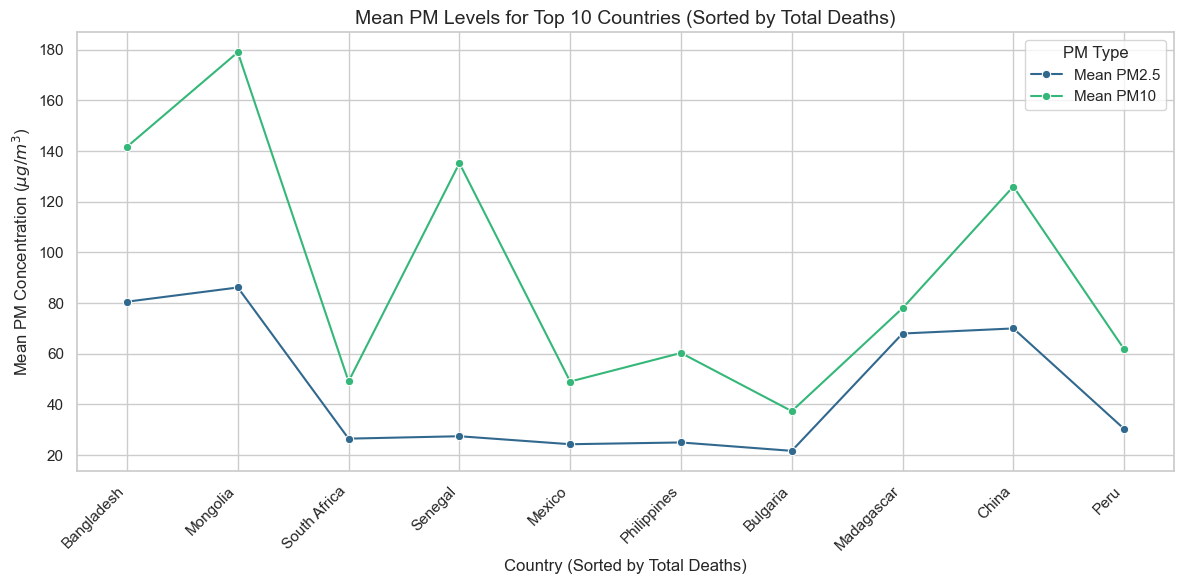

In [106]:
# Aggregate the data by Country
agg_df = df_airQ.groupby('Country').agg(
    PM2_5_Mean=('PM2.5', 'mean'),
    PM10_Mean=('PM10', 'mean'),
    TotalDeaths_Sum=('TotalDeaths', 'sum'),
    PMDeaths_Sum=('PMDeaths', 'sum')
).reset_index()

# Sort by TotalDeaths_Sum and get the top 10 countries (to establish the x-axis order)
top_10_deaths = agg_df.sort_values(by='TotalDeaths_Sum', ascending=False).head(10)

# Define the country order for the X-axis (sorted by Total Deaths)
country_order = top_10_deaths.sort_values('TotalDeaths_Sum', ascending=False)['Country'].tolist()

# Melt the DataFrame for plotting PM2.5 and PM10
melted_pms = top_10_deaths.melt(
    id_vars='Country',
    value_vars=['PM2_5_Mean', 'PM10_Mean'],
    var_name='PMType',
    value_name='PM_Concentration'
)

# Rename PMType for better labels
melted_pms['PMType'] = melted_pms['PMType'].replace({
    'PM2_5_Mean': 'Mean PM2.5',
    'PM10_Mean': 'Mean PM10'
})

# Convert 'Country' to a categorical type with the desired order for plotting
melted_pms['Country'] = pd.Categorical(melted_pms['Country'], categories=country_order, ordered=True)

plt.figure(figsize=(12, 6))

sns.lineplot(
    data=melted_pms,
    x='Country',
    y='PM_Concentration',
    hue='PMType',
    marker='o', # Add markers to emphasize individual data points
    palette='viridis'
)

# Set titles and labels
plt.title('Mean PM Levels for Top 10 Countries (Sorted by Total Deaths)', fontsize=14)
plt.xlabel('Country (Sorted by Total Deaths)', fontsize=12)
plt.ylabel('Mean PM Concentration ($\mu g/m^3$)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(title='PM Type')

# Adjust layout to prevent labels from being cut off
plt.tight_layout()

# Save the plot
plt.savefig('top_10_pms_line_plot_matplotlib.png')


<>:42: SyntaxWarning: invalid escape sequence '\m'
<>:42: SyntaxWarning: invalid escape sequence '\m'
C:\Users\komse\AppData\Local\Temp\ipykernel_3180\691689759.py:42: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Mean PM Concentration ($\mu g/m^3$)', fontsize=12)


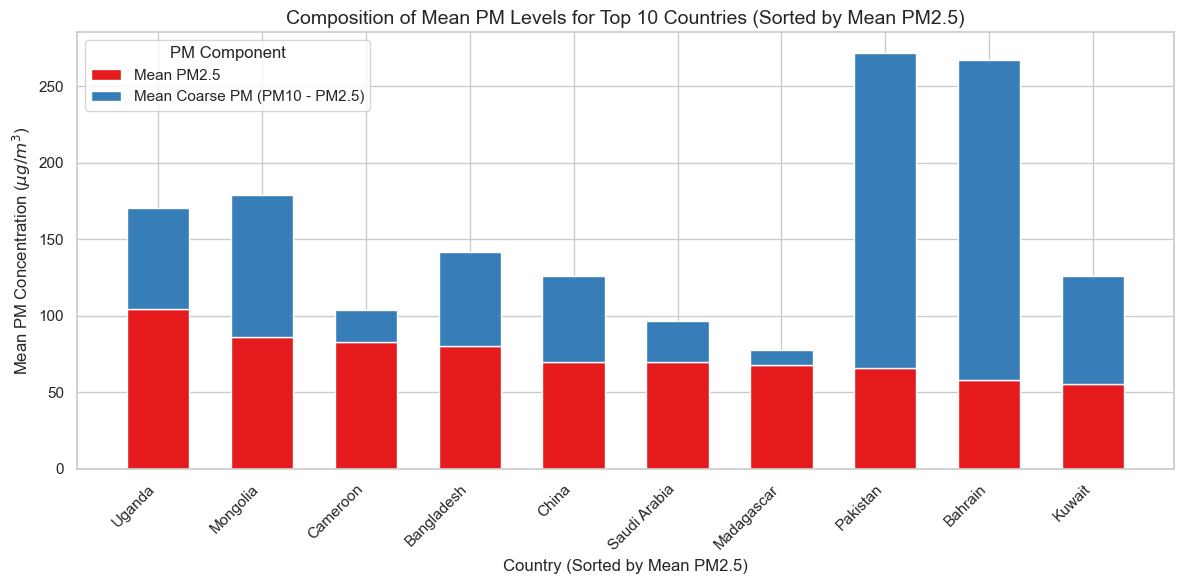

In [110]:
# Aggregate the data by Country, calculating the mean for PM metrics
agg_df = df_airQ.groupby('Country').agg(
    PM2_5_Mean=('PM2.5', 'mean'),
    PM10_Mean=('PM10', 'mean')
).reset_index()

# 1. Calculate Coarse PM (PM10 - PM2.5). This is the component between 2.5 and 10 micrometers.
agg_df['Coarse_PM_Mean'] = agg_df['PM10_Mean'] - agg_df['PM2_5_Mean']

# Clip the value to 0 to handle potential negative values (e.g., due to measurement/averaging errors)
agg_df['Coarse_PM_Mean'] = agg_df['Coarse_PM_Mean'].clip(lower=0)

# 2. Sort by PM2_5_Mean and get the top 10 countries
top_10_pms_stacked = agg_df.sort_values(by='PM2_5_Mean', ascending=False).head(10)
country_order_pm = top_10_pms_stacked['Country'].tolist()
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.6
x = np.arange(len(country_order_pm))

# Plot PM2.5 (the base layer)
ax.bar(
    x,
    top_10_pms_stacked['PM2_5_Mean'],
    bar_width,
    label='Mean PM2.5',
    color='#e41a1c' # Red color
)

# Plot Coarse PM (stacked on top of PM2.5). The 'bottom' parameter creates the stack.
ax.bar(
    x,
    top_10_pms_stacked['Coarse_PM_Mean'],
    bar_width,
    bottom=top_10_pms_stacked['PM2_5_Mean'],
    label='Mean Coarse PM (PM10 - PM2.5)',
    color='#377eb8' # Blue color
)

ax.set_title('Composition of Mean PM Levels for Top 10 Countries (Sorted by Mean PM2.5)', fontsize=14)
ax.set_xlabel('Country (Sorted by Mean PM2.5)', fontsize=12)
ax.set_ylabel('Mean PM Concentration ($\mu g/m^3$)', fontsize=12)

# Set x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(country_order_pm, rotation=45, ha='right')
# Add legend
ax.legend(title='PM Component')

plt.tight_layout()
plt.savefig('top_10_pms_stacked_bar_plot.png')
